In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split 

In [11]:
df=sns.load_dataset('tips')[['total_bill','tip']]

In [12]:
df.drop_duplicates(inplace=True)

In [21]:
def remove_outlier(df,coloumn):
    q1=np.percentile(df[coloumn],25)
    q3=np.percentile(df[coloumn],75)
    iqr=q3-q1
    mini=q1-1.5*iqr
    max=q3+1.5*iqr
    return df[(df[coloumn]>=mini) & (df[coloumn]<=max)]

In [24]:
df=remove_outlier(df,'total_bill')

<Axes: >

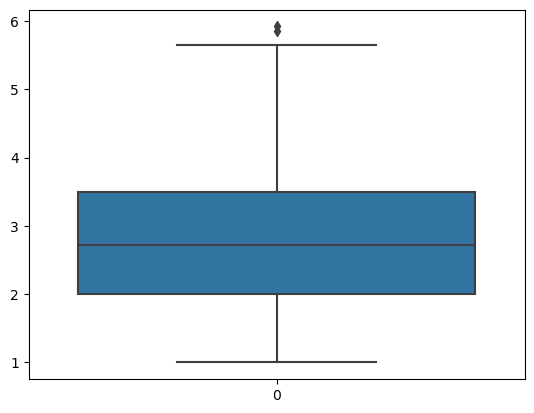

In [25]:
sns.boxplot(df['tip'])

<Axes: >

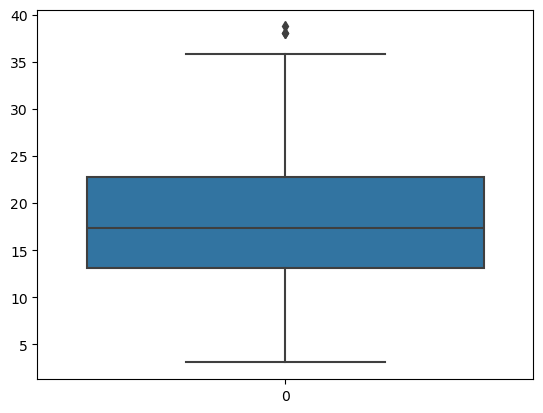

In [26]:
sns.boxplot(df['total_bill'])

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,y_train,x_test,y_test=train_test_split(df['total_bill'],df['tip'],test_size=0.2)

In [63]:
lr=LinearRegression()

In [108]:
lr.fit(np.array([x_train]).reshape(181,1),np.array([x_test]).reshape(181,1))

LinearRegression()

In [109]:
lr.intercept_

array([0.91699121])

In [79]:
df.iloc[93,:]

total_bill    12.03
tip            1.50
Name: 97, dtype: float64

In [127]:
lr.predict(np.array(y_train).reshape(46,1))

array([[1.8801552 ],
       [2.95728519],
       [2.80398579],
       [2.67892576],
       [1.97697588],
       [1.75912936],
       [1.9547878 ],
       [2.46813908],
       [4.22805653],
       [1.64818901],
       [2.32895936],
       [2.35518163],
       [3.08537087],
       [2.55789991],
       [3.15899493],
       [1.80148841],
       [3.49484164],
       [3.26993528],
       [3.50996987],
       [2.88265259],
       [4.82310025],
       [2.25634386],
       [2.77574643],
       [2.76162675],
       [2.63858381],
       [2.43384843],
       [3.18521719],
       [3.39297822],
       [3.92750902],
       [2.06471961],
       [4.12921876],
       [2.59723331],
       [2.99964424],
       [2.71019077],
       [2.14338641],
       [2.2281045 ],
       [3.66831201],
       [2.94215696],
       [3.46761082],
       [2.8019687 ],
       [1.4969067 ],
       [2.69102834],
       [2.73641303],
       [3.3324653 ],
       [1.95983055],
       [4.41161239]])

In [114]:
from sklearn.metrics import accuracy_score

In [135]:
lr.score(y_train.to_numpy().reshape(46,1),y_test.to_numpy().reshape(46,1))

0.06641302551229034

In [139]:
df.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [147]:
lr.coef_*16.99+lr.intercept_

array([[2.63051542]])

In [141]:
lr.predict([[16.99]])

array([[2.63051542]])

In [142]:
lr.intercept_

array([0.91699121])

In [143]:
lr.coef_

array([[0.10085487]])

In [217]:
def model(total_bill):
    pr=lr.predict([[total_bill]])
    return f'your tip is',list(pr)[0][0]
    
    

In [221]:
model(10.34)

('your tip is', 1.9598305482545288)

In [219]:
df.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


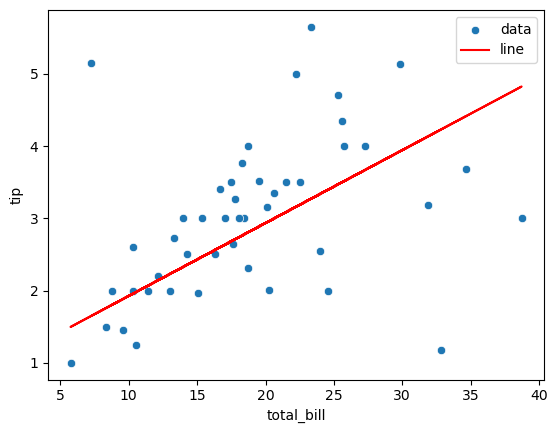

In [244]:
sns.scatterplot(x=y_train,y=y_test)
plt.plot(y_train,pred,color='r')
plt.legend(['data','line'])
plt.show()

In [228]:
pred=lr.predict(y_train.to_numpy().reshape(46,1))

In [224]:
y_train.shape

(46,)

In [235]:
lr.predict([[25]])

array([[3.43836291]])

In [248]:
model(5)

('your tip is', 1.4212655536485732)

In [249]:
model(10)

('your tip is', 1.9255398931672583)

In [254]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [251]:
mean_absolute_error(y_test,pred)

0.754439697404581

In [252]:
mean_squared_error(y_test,pred)

1.1104897495335613

In [253]:
np.sqrt(mean_squared_error(y_test,pred))

1.053797774496398

In [255]:
r2_score(y_test,pred)

0.06641302551229034

In [257]:
from sklearn.linear_model import Lasso,Ridge

In [281]:
l=Lasso(alpha=5)

In [282]:
l.fit(x_train,x_test)

Lasso(alpha=5)

In [283]:
l.predict(y_train)

array([2.77176796, 2.77176796, 2.77176796, 2.77176796, 2.77176796,
       2.77176796, 2.77176796, 2.77176796, 2.77176796, 2.77176796,
       2.77176796, 2.77176796, 2.77176796, 2.77176796, 2.77176796,
       2.77176796, 2.77176796, 2.77176796, 2.77176796, 2.77176796,
       2.77176796, 2.77176796, 2.77176796, 2.77176796, 2.77176796,
       2.77176796, 2.77176796, 2.77176796, 2.77176796, 2.77176796,
       2.77176796, 2.77176796, 2.77176796, 2.77176796, 2.77176796,
       2.77176796, 2.77176796, 2.77176796, 2.77176796, 2.77176796,
       2.77176796, 2.77176796, 2.77176796, 2.77176796, 2.77176796,
       2.77176796])

In [284]:
y_test

array([[1.45],
       [2.01],
       [4.  ],
       [3.5 ],
       [1.25],
       [1.5 ],
       [2.6 ],
       [3.  ],
       [1.17],
       [5.15],
       [3.  ],
       [2.5 ],
       [3.5 ],
       [2.5 ],
       [5.  ],
       [2.  ],
       [4.34],
       [5.65],
       [4.  ],
       [3.51],
       [3.  ],
       [2.72],
       [3.  ],
       [3.76],
       [3.  ],
       [1.96],
       [3.5 ],
       [2.  ],
       [5.14],
       [2.  ],
       [3.18],
       [3.4 ],
       [3.35],
       [3.27],
       [2.2 ],
       [2.  ],
       [4.  ],
       [3.15],
       [4.71],
       [2.31],
       [1.  ],
       [2.64],
       [3.  ],
       [2.55],
       [2.  ],
       [3.68]])

In [264]:
x_test=x_test.to_numpy().reshape(181,1)

In [272]:
y_test=y_test.to_numpy().reshape(46,1)

In [273]:
y_train=y_train.to_numpy().reshape(46,1)

In [285]:
l.score(y_train,y_test)

-0.04505216150844227

In [286]:
r=Ridge()

In [287]:
r.fit(x_train,x_test)

Ridge()

In [288]:
r.predict(y_train)

array([[1.8802552 ],
       [2.95726439],
       [2.80398218],
       [2.67893617],
       [1.97706502],
       [1.75924293],
       [1.95487943],
       [2.46817314],
       [4.2278932 ],
       [1.64831502],
       [2.32900903],
       [2.35522835],
       [3.0853357 ],
       [2.5579239 ],
       [3.1589515 ],
       [1.80159723],
       [3.49476054],
       [3.26987941],
       [3.50988708],
       [2.88264015],
       [4.82287018],
       [2.25640167],
       [2.77574598],
       [2.76162789],
       [2.63859875],
       [2.43388633],
       [3.18517082],
       [3.39290855],
       [3.9273794 ],
       [2.06479891],
       [4.12906651],
       [2.59725289],
       [2.99961868],
       [2.71019767],
       [2.14345688],
       [2.22816547],
       [3.66821146],
       [2.94213785],
       [3.46753278],
       [2.80196531],
       [1.49704969],
       [2.6910374 ],
       [2.736417  ],
       [3.33240242],
       [1.95992161],
       [4.41142847]])

In [289]:
y_test

array([[1.45],
       [2.01],
       [4.  ],
       [3.5 ],
       [1.25],
       [1.5 ],
       [2.6 ],
       [3.  ],
       [1.17],
       [5.15],
       [3.  ],
       [2.5 ],
       [3.5 ],
       [2.5 ],
       [5.  ],
       [2.  ],
       [4.34],
       [5.65],
       [4.  ],
       [3.51],
       [3.  ],
       [2.72],
       [3.  ],
       [3.76],
       [3.  ],
       [1.96],
       [3.5 ],
       [2.  ],
       [5.14],
       [2.  ],
       [3.18],
       [3.4 ],
       [3.35],
       [3.27],
       [2.2 ],
       [2.  ],
       [4.  ],
       [3.15],
       [4.71],
       [2.31],
       [1.  ],
       [2.64],
       [3.  ],
       [2.55],
       [2.  ],
       [3.68]])

In [290]:
r.score(y_train,y_test)

0.06645340875063954

In [291]:
a=[1,2,3,4,5]

In [344]:
max=a[1]

In [335]:
for i in a:
    if i>max:
        print(i)
    else:
        max

3
4
5
